# 0. Khai báo các dữ liệu cần dùng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# 1. Khởi tạo dữ liệu

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# Hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,50.939971,1.157952,9.547098,8.020500,25.355882
1,31.448226,6.782118,10.187586,13.977987,27.615087
2,48.849537,27.600387,12.834131,5.488194,18.882935
3,56.388418,4.378068,13.231050,9.212482,18.976151
4,59.725278,2.976805,9.059594,16.433090,23.102133


# 2. Trực quan hoá dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

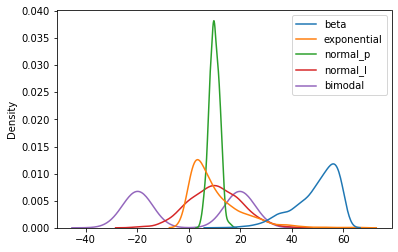

In [5]:
sns.kdeplot(data = df)

In [6]:
# Hiển thị thống kê về dữ liệu sinh ra
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.492749,10.259217,9.943657,10.027579,-0.032513
std,8.585001,10.041427,2.027722,10.011907,20.170084
min,12.430067,0.018013,4.318027,-20.873428,-30.158854
25%,44.637961,2.900538,8.538778,3.031192,-19.815802
50%,51.665182,7.022316,9.913484,9.970212,0.295178
75%,56.289409,14.754114,11.387139,17.134384,19.767282
max,59.995903,65.173667,16.972067,40.352060,29.123567


<AxesSubplot:ylabel='Density'>

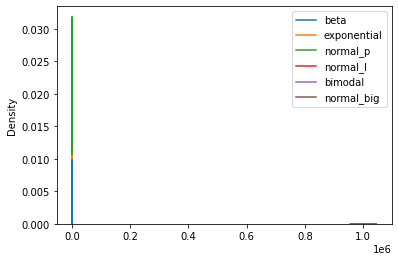

In [8]:
# Thêm một đặc trưng mới với giá trị lớn hơn nhiều
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

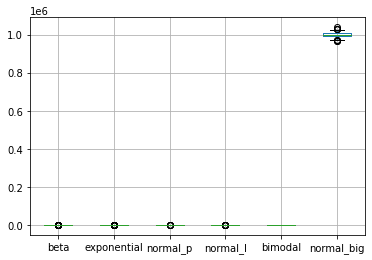

In [9]:
# Trực quan hoá bằng biểu đồ box plot
df.boxplot()

# 3. Chuẩn hoá với Robust Scaling

In [10]:
# Khai báo đối tượng Robust Scaler
scaler = RobustScaler()

In [11]:
# CHuẩn hoá dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# Lấy danh sách cột
col_names = list(df.columns)

# Chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hoá
df_s = pd.DataFrame(df_s, columns = col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.062242,-0.494734,-0.128631,-0.138246,0.633117,-0.848912
1,-1.735145,-0.020264,0.096231,0.284175,0.690192,1.193815
2,-0.241656,1.736022,1.025378,-0.317802,0.469588,-0.597751
3,0.405378,-0.223076,1.164728,-0.053728,0.471943,-0.394978
4,0.691768,-0.341290,-0.299783,0.458256,0.576179,-0.301407


<AxesSubplot:ylabel='Density'>

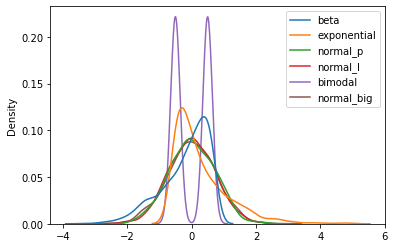

In [13]:
# Biểu diễn dữ liệu đã được chuẩn hoá
sns.kdeplot(data = df_s)

<AxesSubplot:>

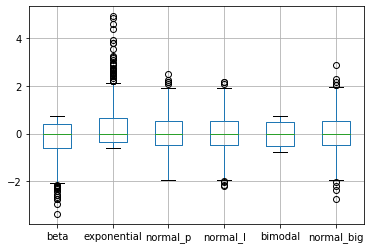

In [14]:
# Biểu diễn dữ liệu bằng boxplot
df_s.boxplot()

In [15]:
# Lấy các dữ liệu min ở mỗi cột trong bộ dữ liệu đã được chuẩn hoá
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.3674027669295,
 -0.5909020621701431,
 -1.9644483849270322,
 -2.1869971635464585,
 -0.7693698716344641,
 -2.7183157496344186]

In [16]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7149944880159409,
 4.905806484851142,
 2.478121430202403,
 2.1542532881168492,
 0.7283007465945057,
 2.853175252069778]

In [17]:
# Giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_

array([5.16651822e+01, 7.02231596e+00, 9.91348411e+00, 9.97021239e+00,
       2.95177999e-01, 1.00011408e+06])